In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
!python extract_git_history.py -i occupancy.csv -o occupancy_history.csv --start-at be9808b76526d4b8646232e1d63148f10930576b

In [13]:
df = pd.read_csv("occupancy_history.csv", parse_dates=[0])
df

,timestamp_utc,url,training_area_m2,gym,occupancy
0,2025-03-23 18:25:14.228670,https://www.fitnesspark.ch/fitnessparks/zueric...,600.0,Fitnesspark Zürich Stadelhofen,105.0
1,2025-03-23 18:25:23.270648,https://www.fitnesspark.ch/fitnessparks/zug-ei...,1341.0,Fitnesspark Zug Eichstätte,171.0
2,2025-03-23 18:25:30.989067,https://www.fitnesspark.ch/fitnessparks/greife...,734.0,Fitnesspark Greifensee Milandia,58.0
3,2025-03-23 18:25:40.150531,https://www.fitnesspark.ch/fitnessparks/regens...,553.0,Fitnesspark Regensdorf,109.0
4,2025-03-23 18:25:49.202268,https://www.fitnesspark.ch/fitnessparks/winter...,1200.0,Fitnesspark Winterthur,89.0
...,...,...,...,...,...
3835,2025-03-27 22:33:56.098077,https://www.fitnesspark.ch/fitnessparks/baden-...,590.0,Fitnesspark Baden Trafo,NaN
3836,2025-03-27 22:34:03.543050,https://www.fitnesspark.ch/fitnessparks/basel-...,NaN,Fitnesspark Basel Heuwaage,NaN
3837,2025-03-27 22:34:10.708350,https://www.fitnesspark.ch/fitnessparks/bern-c...,1200.0,Fitnesspark Bern City,NaN
3838,2025-03-27 22:34:18.187208,https://www.fitnesspark.ch/fitnessparks/oberho...,311.0,Fitnesspark Oberhofen,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp_utc     3840 non-null   datetime64[ns]
 1   url               3840 non-null   object        
 2   training_area_m2  3600 non-null   float64       
 3   gym               3840 non-null   object        
 4   occupancy         3246 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 150.1+ KB


In [15]:
df_puls = df[df.gym == "Fitnesspark Zürich Puls 5"]
df_puls

,timestamp_utc,url,training_area_m2,gym,occupancy
6,2025-03-23 18:26:06.104158,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,102.0
22,2025-03-23 18:34:57.492939,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,102.0
38,2025-03-23 18:49:19.722402,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,89.0
54,2025-03-23 19:11:25.200603,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,6.0
70,2025-03-23 19:28:55.788241,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,1.0
...,...,...,...,...,...
3766,2025-03-27 21:12:09.101524,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,35.0
3782,2025-03-27 21:31:43.729140,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,NaN
3798,2025-03-27 21:49:36.687309,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,NaN
3814,2025-03-27 22:12:04.820503,https://www.fitnesspark.ch/fitnessparks/puls-5...,850.0,Fitnesspark Zürich Puls 5,NaN


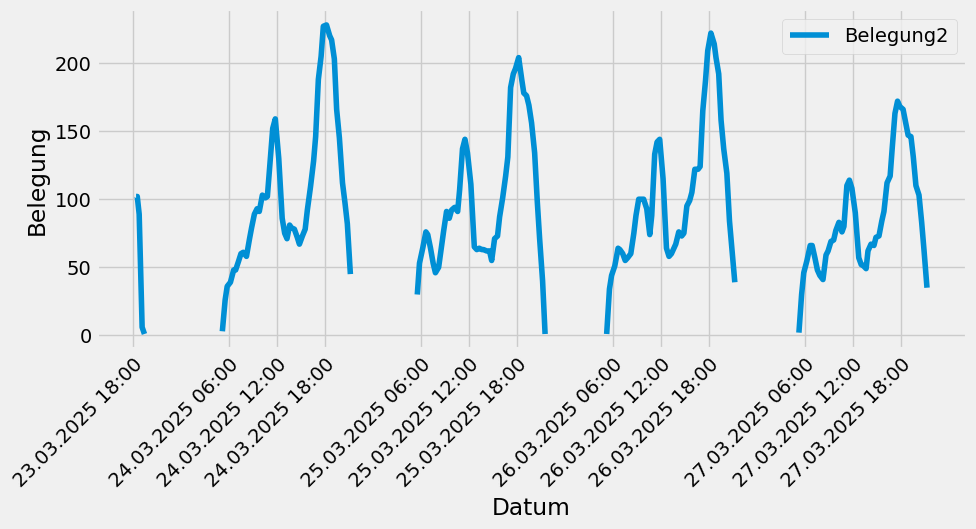

In [ ]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(5, figsize=(10,5))

# TODO add all gyms
for ax in axs:
    pass

df_puls.plot(kind='line', y='occupancy', x="timestamp_utc", label="Puls 5", ax=ax)
#ax.legend().set_visible(False)

ax.set_ylabel('Belegung')
ax.set_xlabel('Datum')

# Major ticks alle 5 Tage, ab dem 5.
ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(6, 22, 6)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y %H:%M'))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Minor ticks off
ax.xaxis.set_minor_locator(ticker.NullLocator())

plt.show()